#  WEEK 3
# Univariate & Bivariate Analysis

In [25]:
import pandas as pd 
df = pd.read_csv("C:\\Users\lovely\Downloads\Indian_Kids_Screen_Time_final.csv")
df.head(9)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Device_Share,Edu_Recreational_Percent
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teen,0.470346,42.0
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen,0.147549,30.0
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Teen,0.256075,32.0
3,15,Female,1.21,Laptop,False,0.39,Unknown,Urban,Teen,0.147549,39.0
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen,0.470346,49.0
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Teen,0.470346,44.0
6,17,Male,2.97,TV,False,0.48,Unknown,Rural,Teen,0.256075,48.0
7,10,Male,2.74,TV,True,0.54,Unknown,Urban,Pre-Teen,0.256075,54.0
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,Teen,0.147549,36.0


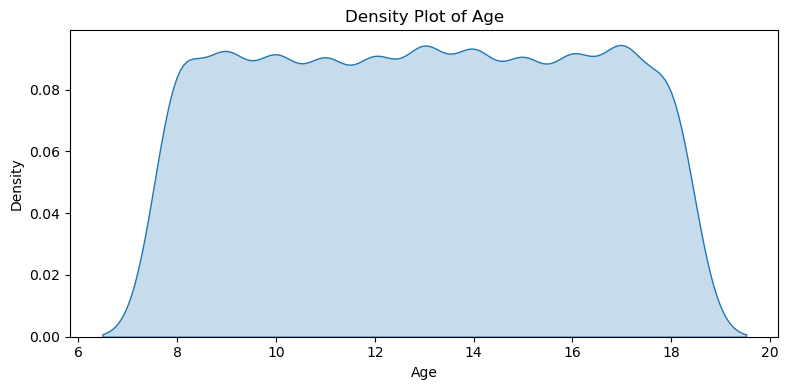

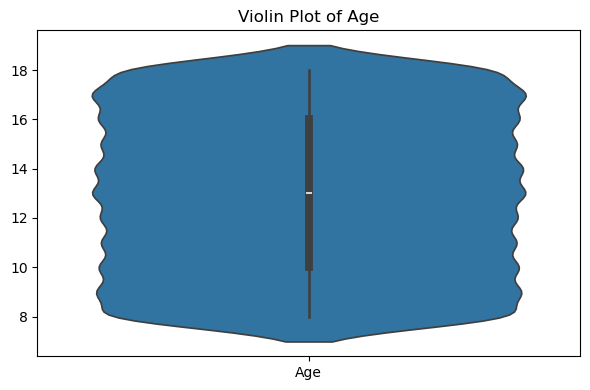

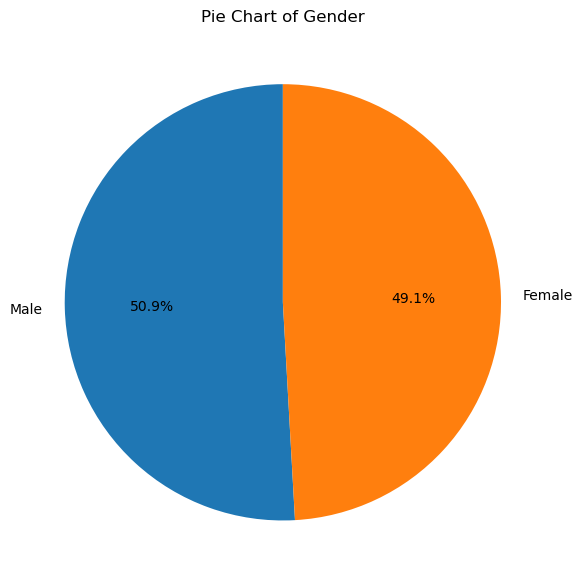

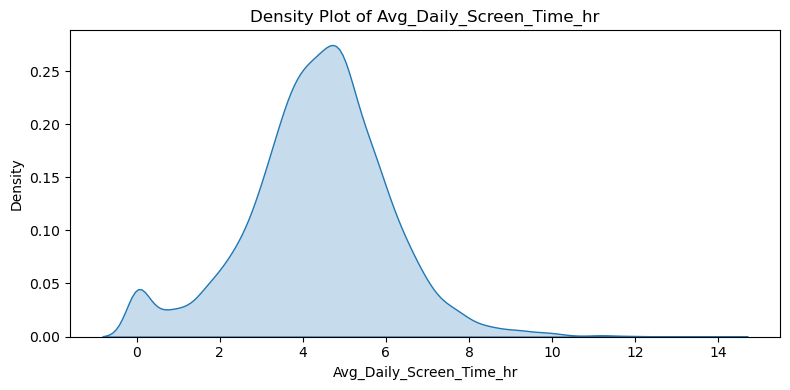

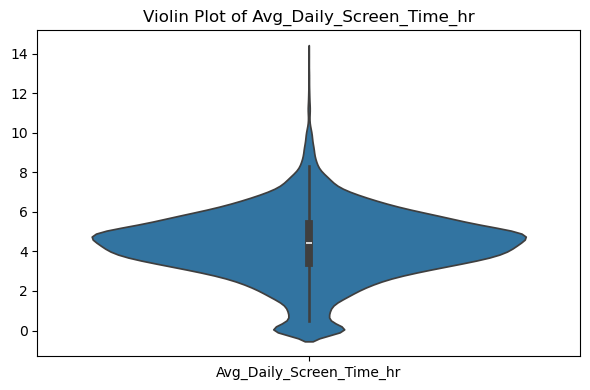

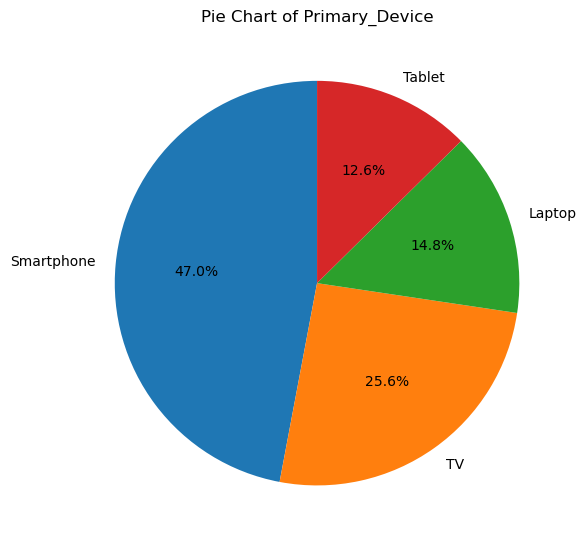

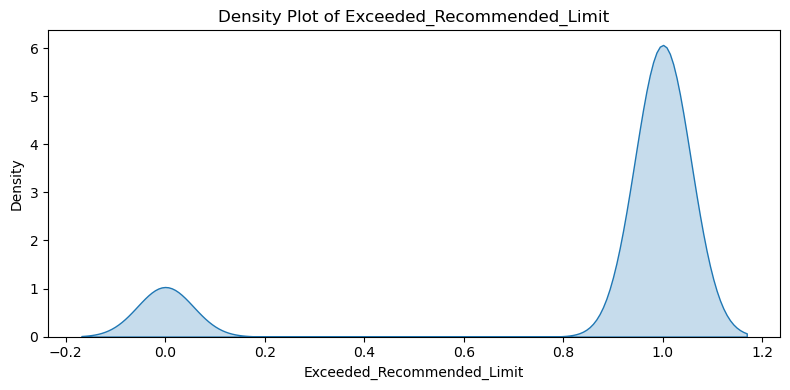

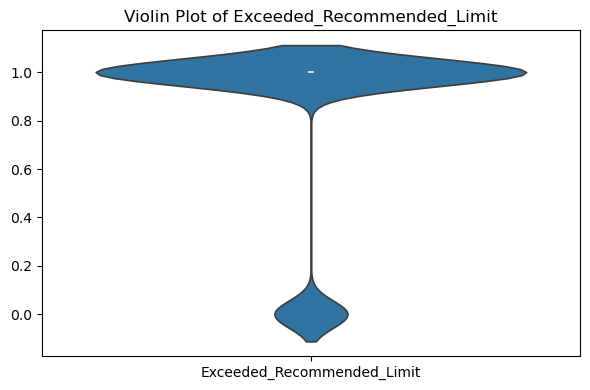

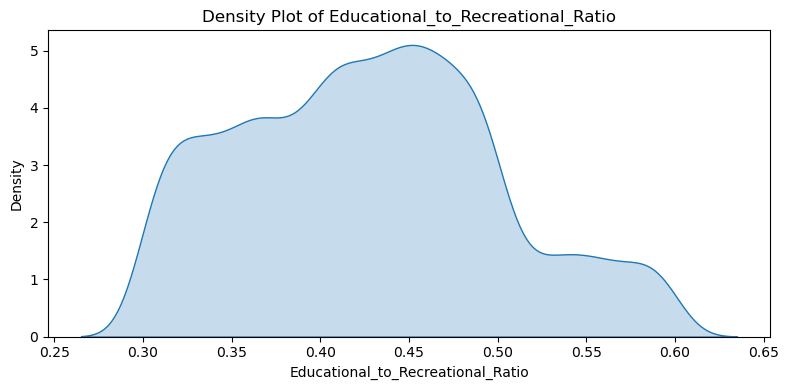

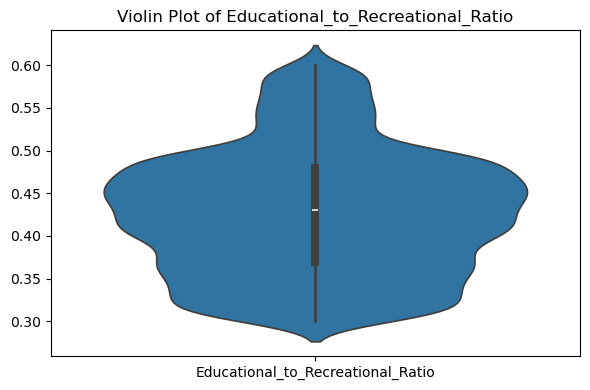

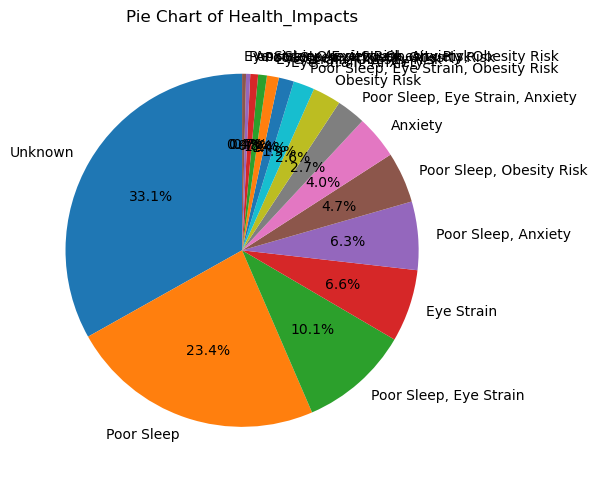

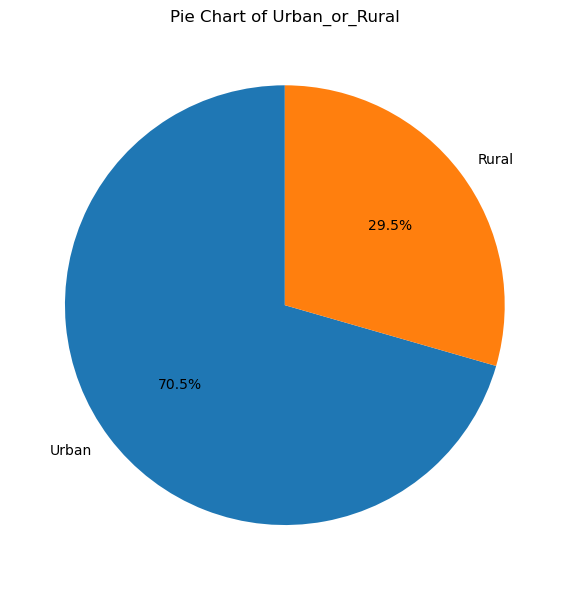

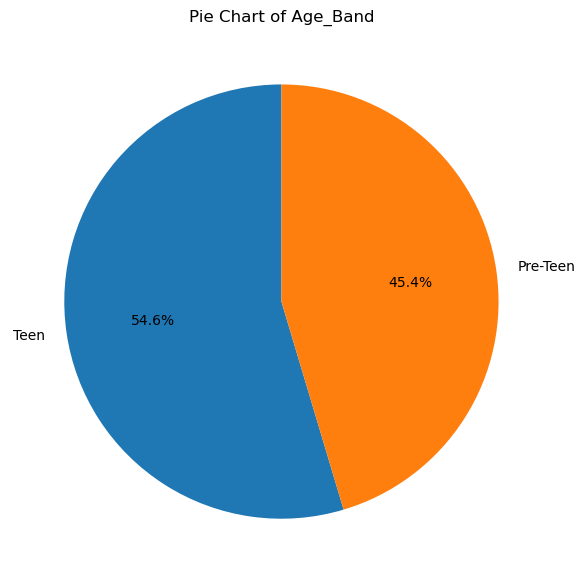

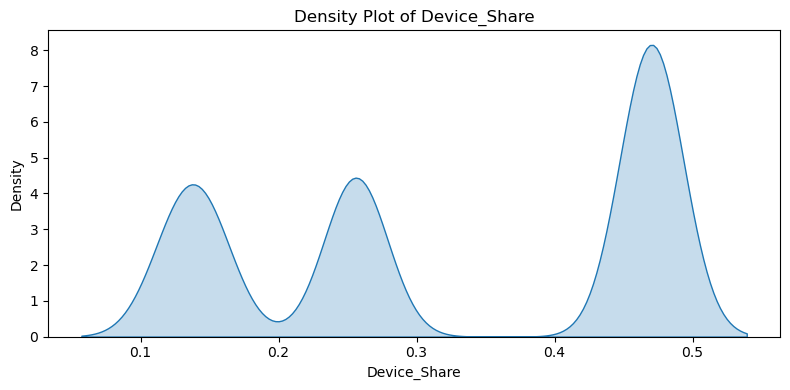

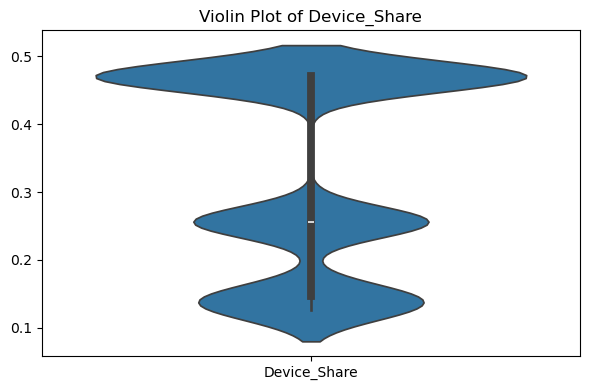

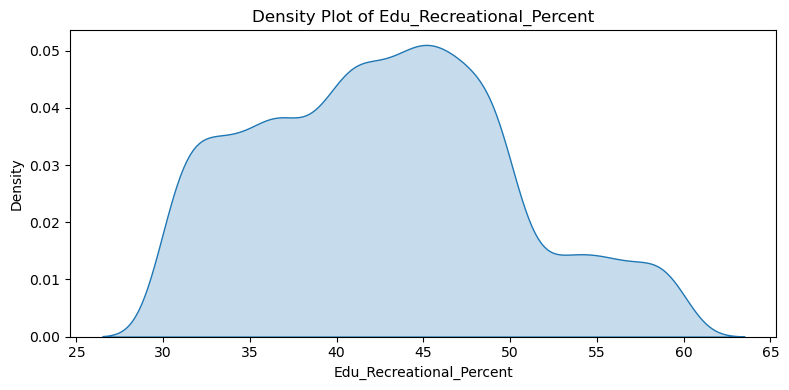

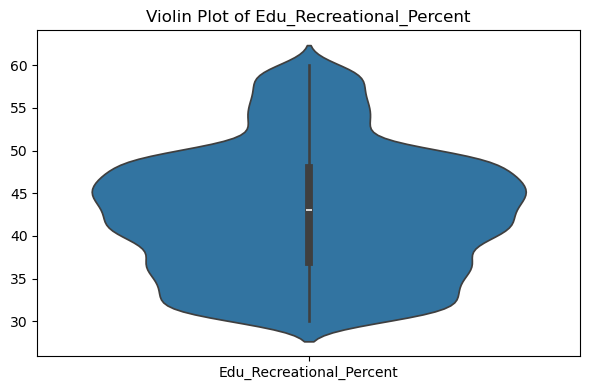

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\lovely\Downloads\Indian_Kids_Screen_Time_final.csv")

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # Pie Chart for categorical columns
        plt.figure(figsize=(6, 6))
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'Pie Chart of {col}')
        plt.ylabel('')
        plt.tight_layout()
        plt.show()

    elif pd.api.types.is_numeric_dtype(df[col]):
        # KDE Plot for numeric columns
        plt.figure(figsize=(8, 4))
        sns.kdeplot(data=df, x=col, fill=True)
        plt.title(f'Density Plot of {col}')
        plt.tight_layout()
        plt.show()

        # Violin Plot for numeric columns
        plt.figure(figsize=(6, 4))
        sns.violinplot(data=df[[col]])
        plt.title(f'Violin Plot of {col}')
        plt.tight_layout()
        plt.show()

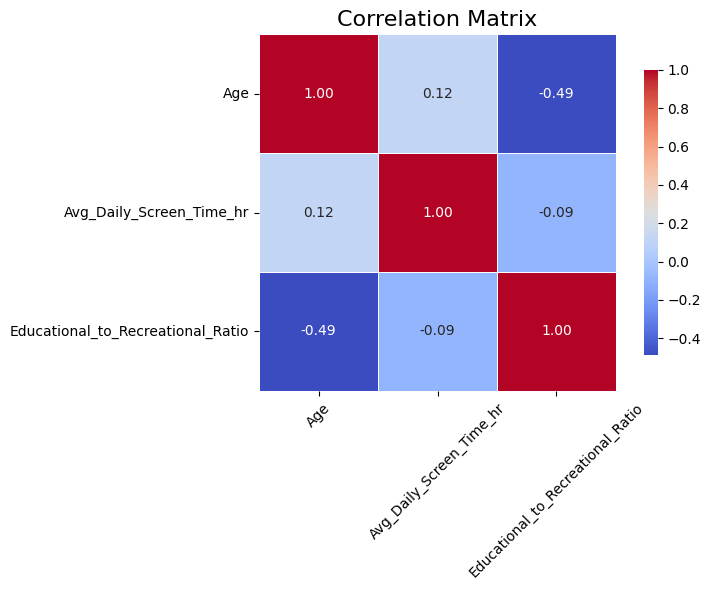

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
corr_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
corr_matrix = df[corr_cols].corr()

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




📊 Bivariate Analysis: Avg_Daily_Screen_Time_hr vs Gender


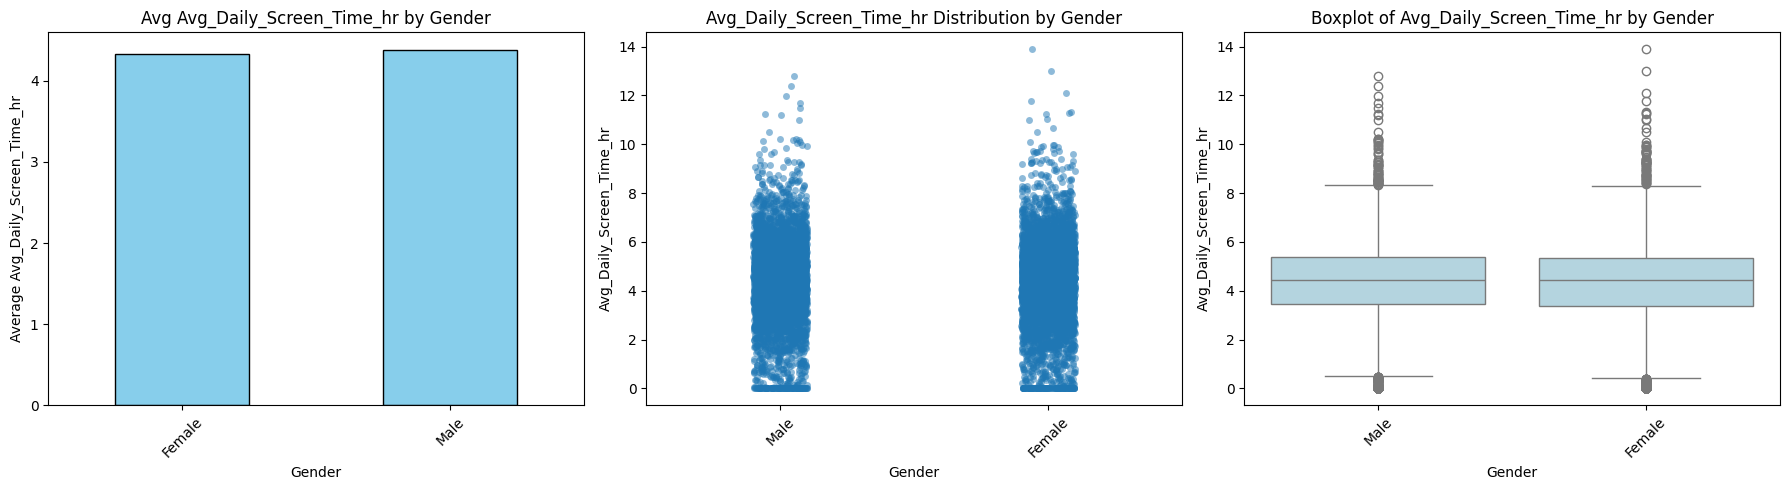


📊 Bivariate Analysis: Avg_Daily_Screen_Time_hr vs Urban_or_Rural


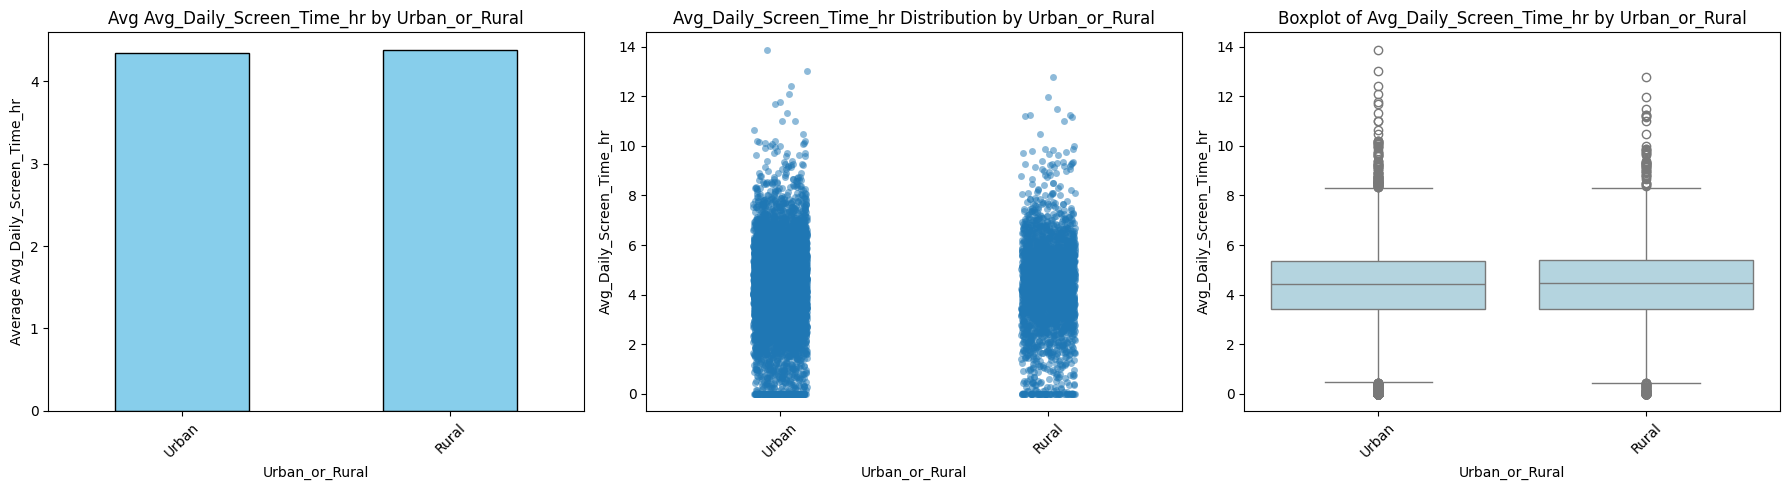


📊 Bivariate Analysis: Avg_Daily_Screen_Time_hr vs Primary_Device


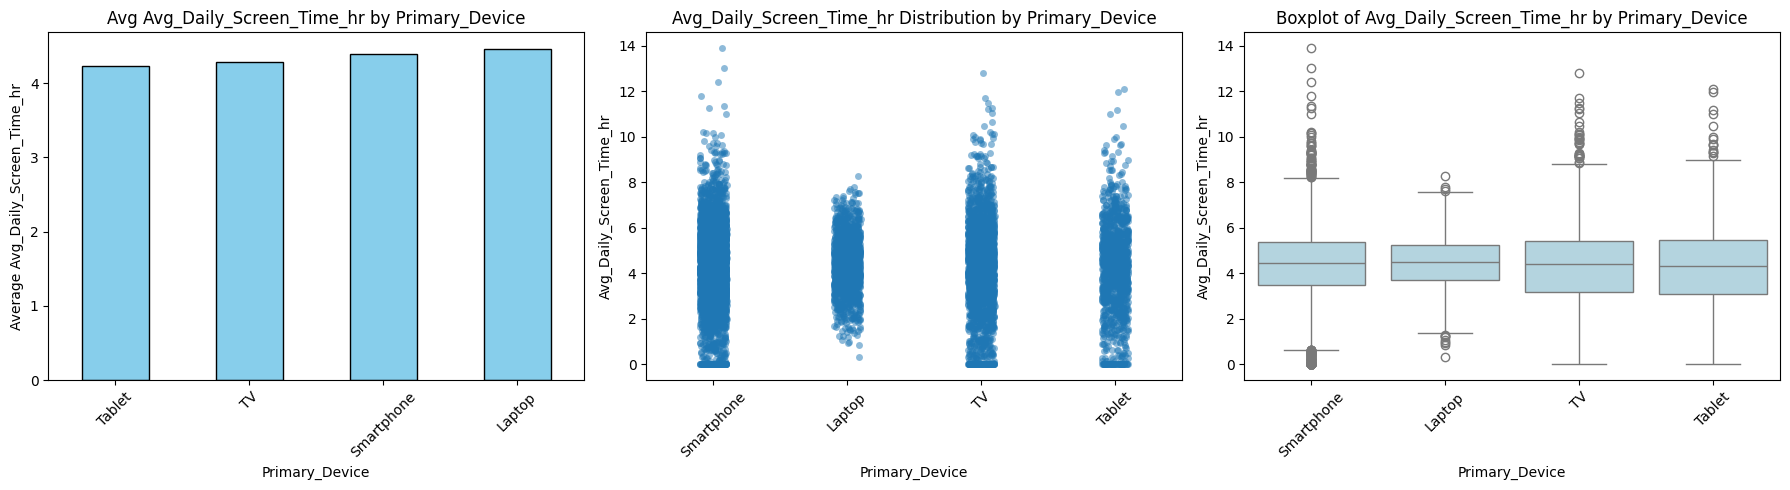

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
df = pd.read_csv("C:\\Users\lovely\Downloads\Indian_Kids_Screen_Time_final.csv")

# Variables to analyze screen time against
bivariate_vars = ['Gender', 'Age_Group', 'Urban_or_Rural', 'Device_Category', 'Health_Impact_Category', 'Primary_Device']
numeric_var = 'Avg_Daily_Screen_Time_hr'

def plot_bivariate_analysis(df, cat_vars, num_var):
    for var in cat_vars:
        if var not in df.columns or num_var not in df.columns:
            continue

        print(f"\n📊 Bivariate Analysis: {num_var} vs {var}")
        plt.figure(figsize=(18, 5))

        # 1. Grouped Bar Chart
        plt.subplot(1, 3, 1)
        avg_screen_time = df.groupby(var)[num_var].mean().sort_values()
        avg_screen_time.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Avg {num_var} by {var}')
        plt.xlabel(var)
        plt.ylabel(f'Average {num_var}')
        plt.xticks(rotation=45)

        # 2. Strip Plot
        plt.subplot(1, 3, 2)
        sns.stripplot(x=var, y=num_var, data=df, jitter=True, alpha=0.5)
        plt.title(f'{num_var} Distribution by {var}')
        plt.xlabel(var)
        plt.ylabel(num_var)
        plt.xticks(rotation=45)

        # 3. Box Plot (no palette warning)
        plt.subplot(1, 3, 3)
        sns.boxplot(x=var, y=num_var, data=df, color='lightblue')
        plt.title(f'Boxplot of {num_var} by {var}')
        plt.xlabel(var)
        plt.ylabel(num_var)
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

# Run the function
plot_bivariate_analysis(df, bivariate_vars, numeric_var)



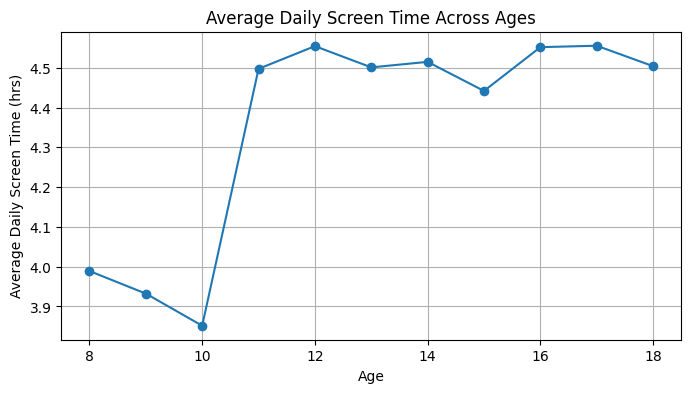

In [17]:
#Bivariate Analysis- Screen Time by Age Group
avg_screen_time_by_age = df.groupby('Age')['Avg_Daily_Screen_Time_hr'].mean()
plt.figure(figsize=(8,4))
avg_screen_time_by_age.plot(kind='line', marker='o')
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.title("Average Daily Screen Time Across Ages")
plt.grid(True)
plt.show()


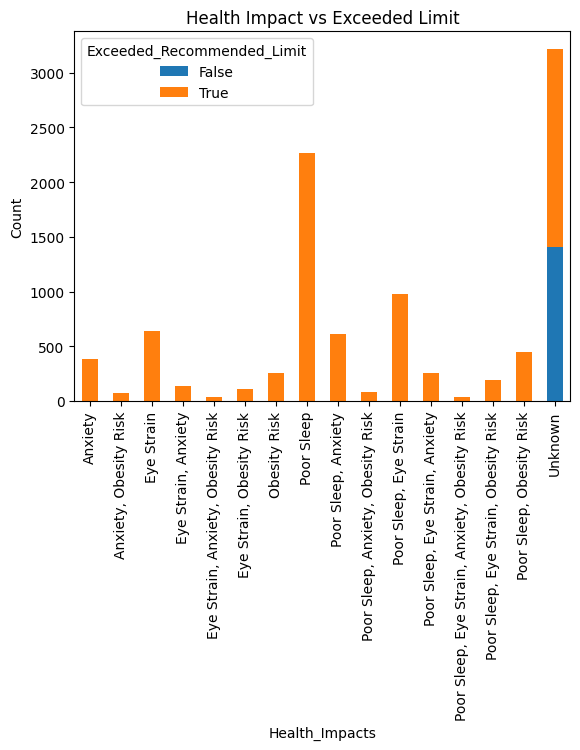

In [18]:
pd.crosstab(df['Health_Impacts'], df['Exceeded_Recommended_Limit']).plot(kind="bar", stacked=True)
plt.title("Health Impact vs Exceeded Limit")
plt.ylabel("Count")
plt.show()